In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('excess_mortality.csv')

In [3]:
data['location'].unique()

array(['Albania', 'Andorra', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Belarus', 'Belgium', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Denmark', 'Ecuador', 'Egypt', 'El Salvador', 'England & Wales',
       'Estonia', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Georgia', 'Germany', 'Gibraltar', 'Greece',
       'Greenland', 'Guadeloupe', 'Guatemala', 'Hong Kong', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kosovo', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia',
       'Malta', 'Martinique', 'Mauritius', 'Mayotte', 'Mexico', 'Moldova',
       'Monaco', 'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand',
       'Nicaragua', 'North Macedonia', 'Northern Ireland', 'Norway',
       'Oman', 'Panama', 'Paragu

In [4]:
data.isna().sum()

location                                0
date                                    0
p_scores_all_ages                     480
p_scores_15_64                       2293
p_scores_65_74                       2293
p_scores_75_84                       2293
p_scores_85plus                      2293
deaths_2020_all_ages                 1796
average_deaths_2015_2019_all_ages    1778
deaths_2015_all_ages                 2012
deaths_2016_all_ages                 1900
deaths_2017_all_ages                 1830
deaths_2018_all_ages                 1830
deaths_2019_all_ages                 1830
deaths_2010_all_ages                 3613
deaths_2011_all_ages                 3510
deaths_2012_all_ages                 3510
deaths_2013_all_ages                 3510
deaths_2014_all_ages                 3509
deaths_2021_all_ages                 3858
time                                    0
time_unit                               0
dtype: int64

In [5]:
# convert date and save year and month separatly
data.date = pd.to_datetime(data.date)
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [6]:
# locations
loc_freq = data['location'].value_counts()
#loc_freq.index.tolist()

In [7]:
data['excess_deaths'] = data['deaths_2020_all_ages'] - data['average_deaths_2015_2019_all_ages']
data['rel_excess_deaths'] = data['excess_deaths'] / data['average_deaths_2015_2019_all_ages']

In [8]:
# select one location
germany = data[data['location'] == 'Germany']
france = data[data['location'] == 'France']
austria = data[data['location'] == 'Austria']
usa = data[data['location'] == 'United States']
israel = data[data['location'] == 'Israel']
italia = data[data['location'] == 'Italy']

In [9]:
# descriptive statistics
germany['p_scores_all_ages'].describe()

count    79.000000
mean      5.537342
std      11.226604
min     -16.330000
25%      -1.035000
50%       4.460000
75%       8.785000
max      39.290000
Name: p_scores_all_ages, dtype: float64

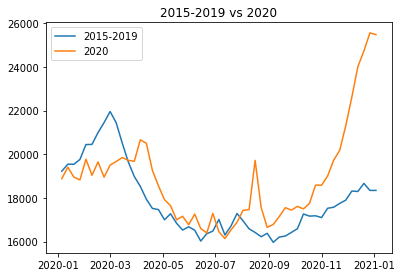

In [10]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(germany['date'], germany['average_deaths_2015_2019_all_ages'])
axes.plot(germany['date'], germany['deaths_2020_all_ages'])
axes.set_title('2015-2019 vs 2020')
axes.legend(['2015-2019', '2020'], loc = 'upper left')

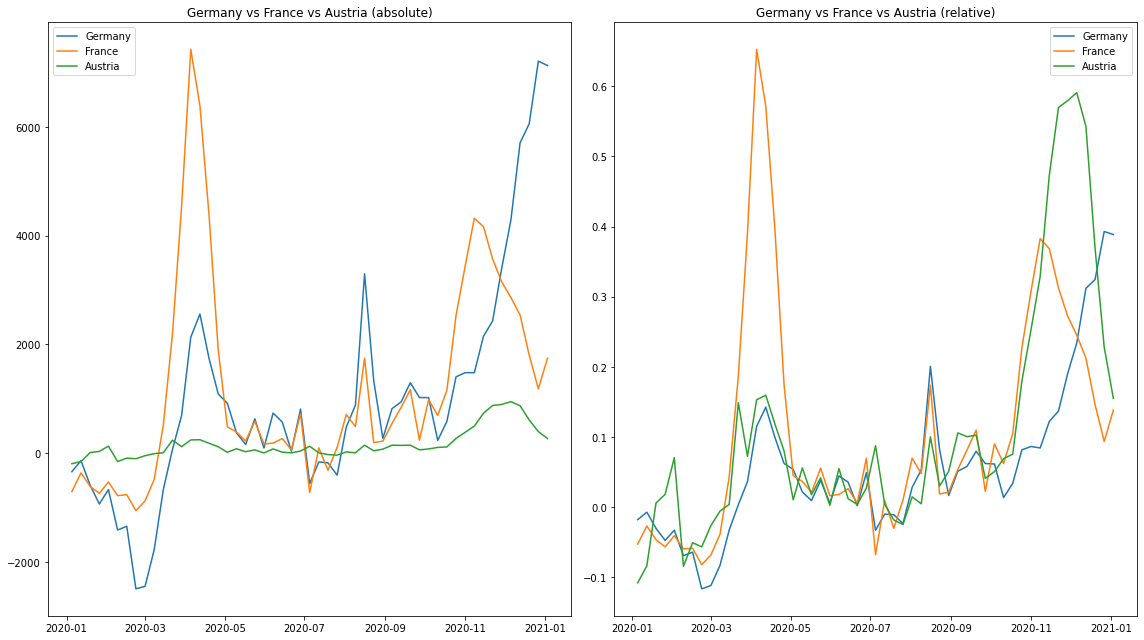

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,9))

axes[0].plot(germany['date'], germany['excess_deaths'], label = 'Germany')
axes[0].plot(france['date'], france['excess_deaths'], label = 'France')
axes[0].plot(austria['date'], austria['excess_deaths'], label = 'Austria')
axes[0].legend(loc = 0)
axes[0].set_title('Germany vs France vs Austria (absolute)')

axes[1].plot(germany['date'], germany['rel_excess_deaths'], label = 'Germany')
axes[1].plot(france['date'], france['rel_excess_deaths'], label = 'France')
axes[1].plot(austria['date'], austria['rel_excess_deaths'], label = 'Austria')
axes[1].legend(loc = 0)
axes[1].set_title('Germany vs France vs Austria (relative)')
plt.tight_layout()

Text(0.5, 1.0, 'All countries')

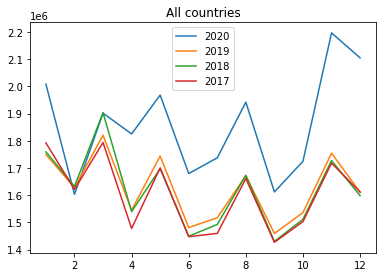

In [12]:
# comparison of months
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(data.groupby('month')['deaths_2020_all_ages'].sum(), label = '2020')
axes.plot(data.groupby('month')['deaths_2019_all_ages'].sum(), label = '2019')
axes.plot(data.groupby('month')['deaths_2018_all_ages'].sum(), label = '2018')
axes.plot(data.groupby('month')['deaths_2017_all_ages'].sum(), label = '2017')
axes.legend(loc = 0)
axes.set_title('All countries')

Text(0.5, 1.0, 'Italia')

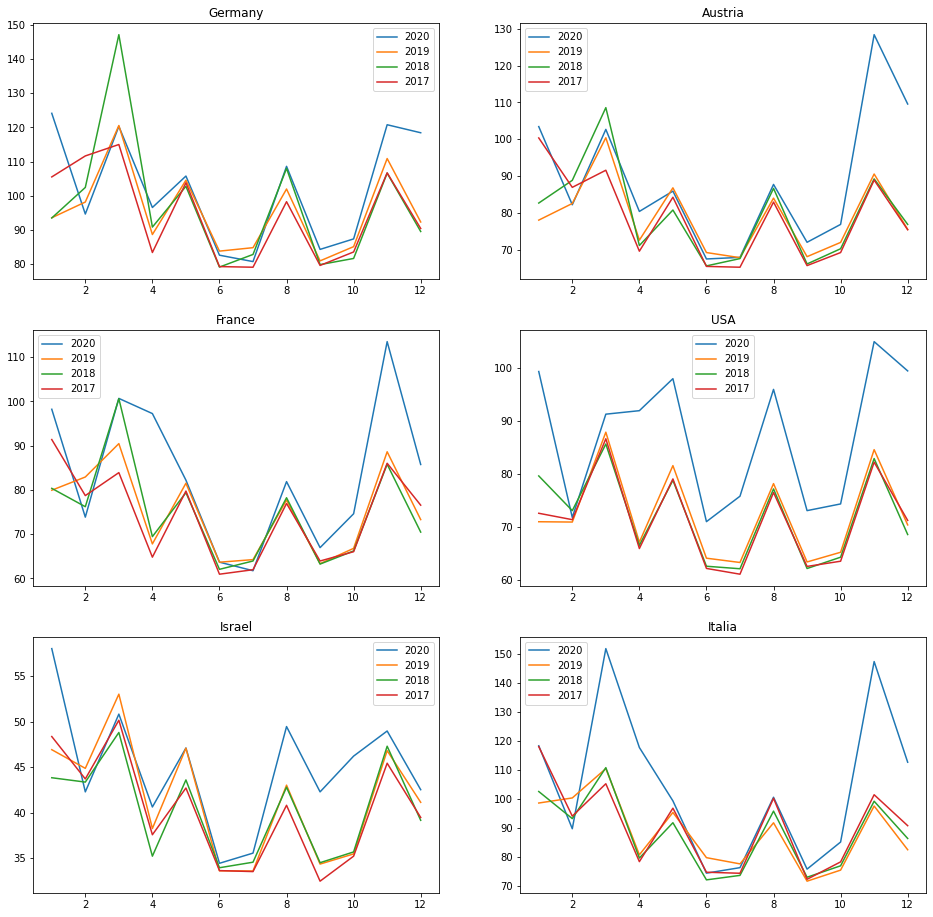

In [13]:
total_inhabitats_ger = 82*10^6
total_inhabitats_aus = 8*10^6
total_inhabitats_fra = 67*10^6
total_inhabitats_usa = 328*10^6
total_inhabitats_israel = 9*10^6
total_inhabitats_italia = 60*10^6
# comparison of months
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,16))
axes[0,0].plot((germany.groupby('month')['deaths_2020_all_ages'].sum()) / total_inhabitats_ger, label = '2020')
axes[0,0].plot((germany.groupby('month')['deaths_2019_all_ages'].sum()) / total_inhabitats_ger, label = '2019')
axes[0,0].plot((germany.groupby('month')['deaths_2018_all_ages'].sum()) / total_inhabitats_ger, label = '2018')
axes[0,0].plot((germany.groupby('month')['deaths_2017_all_ages'].sum()) / total_inhabitats_ger, label = '2017')
axes[0,0].legend(loc = 0)
axes[0,0].set_title('Germany')

axes[0,1].plot((austria.groupby('month')['deaths_2020_all_ages'].sum()) / total_inhabitats_aus, label = '2020')
axes[0,1].plot((austria.groupby('month')['deaths_2019_all_ages'].sum()) / total_inhabitats_aus, label = '2019')
axes[0,1].plot((austria.groupby('month')['deaths_2018_all_ages'].sum()) / total_inhabitats_aus, label = '2018')
axes[0,1].plot((austria.groupby('month')['deaths_2017_all_ages'].sum()) / total_inhabitats_aus, label = '2017')
axes[0,1].legend(loc = 0)
axes[0,1].set_title('Austria')

axes[1,0].plot((france.groupby('month')['deaths_2020_all_ages'].sum()) / total_inhabitats_fra, label = '2020')
axes[1,0].plot((france.groupby('month')['deaths_2019_all_ages'].sum()) / total_inhabitats_fra, label = '2019')
axes[1,0].plot((france.groupby('month')['deaths_2018_all_ages'].sum()) / total_inhabitats_fra, label = '2018')
axes[1,0].plot((france.groupby('month')['deaths_2017_all_ages'].sum()) / total_inhabitats_fra, label = '2017')
axes[1,0].legend(loc = 0)
axes[1,0].set_title('France')

axes[1,1].plot((usa.groupby('month')['deaths_2020_all_ages'].sum()) / total_inhabitats_usa, label = '2020')
axes[1,1].plot((usa.groupby('month')['deaths_2019_all_ages'].sum()) / total_inhabitats_usa, label = '2019')
axes[1,1].plot((usa.groupby('month')['deaths_2018_all_ages'].sum()) / total_inhabitats_usa, label = '2018')
axes[1,1].plot((usa.groupby('month')['deaths_2017_all_ages'].sum()) / total_inhabitats_usa, label = '2017')
axes[1,1].legend(loc = 0)
axes[1,1].set_title('USA')

axes[2,0].plot((israel.groupby('month')['deaths_2020_all_ages'].sum()) / total_inhabitats_israel, label = '2020')
axes[2,0].plot((israel.groupby('month')['deaths_2019_all_ages'].sum()) / total_inhabitats_israel, label = '2019')
axes[2,0].plot((israel.groupby('month')['deaths_2018_all_ages'].sum()) / total_inhabitats_israel, label = '2018')
axes[2,0].plot((israel.groupby('month')['deaths_2017_all_ages'].sum()) / total_inhabitats_israel, label = '2017')
axes[2,0].legend(loc = 0)
axes[2,0].set_title('Israel')

axes[2,1].plot((italia.groupby('month')['deaths_2020_all_ages'].sum()) / total_inhabitats_italia, label = '2020')
axes[2,1].plot((italia.groupby('month')['deaths_2019_all_ages'].sum()) / total_inhabitats_italia, label = '2019')
axes[2,1].plot((italia.groupby('month')['deaths_2018_all_ages'].sum()) / total_inhabitats_italia, label = '2018')
axes[2,1].plot((italia.groupby('month')['deaths_2017_all_ages'].sum()) / total_inhabitats_italia, label = '2017')
axes[2,1].legend(loc = 0)
axes[2,1].set_title('Italia')

We can see that in 2020 the mortality often differs compared to the previous years.